#Section 1 : Regression


##Boston Housing Price

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/boston.csv')
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
dataset.shape

(506, 14)

In [ ]:
dataset.isnull().sum() # return number of missing values for each variable

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MDEV       0
dtype: int64

In [ ]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647422,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Text(0.5, 1.0, 'Histogram of Price')

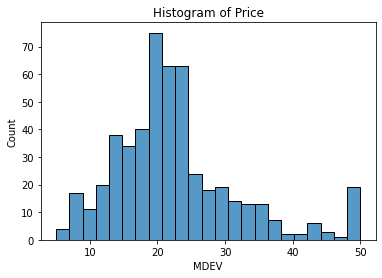

In [ ]:
#histogram of price
sns.histplot(dataset['MDEV'])
plt.title("Histogram of Price")

###Correlation Matrix

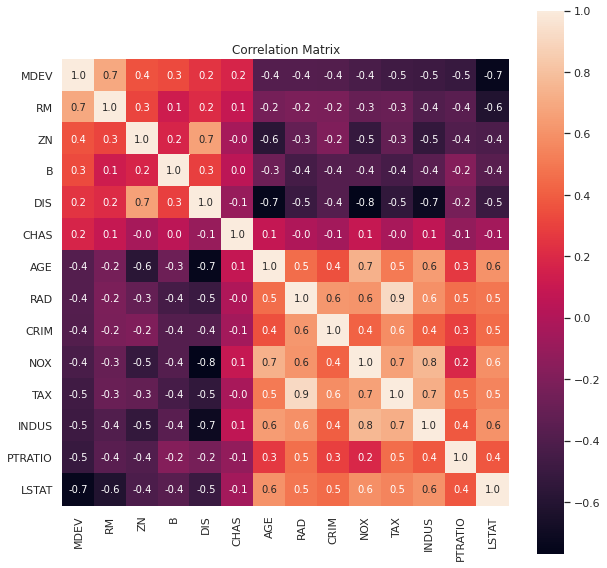

In [ ]:
#price correlation matrix
correlation_matrix = dataset.corr()
k = 14 #number of variables for heatmap
cols = correlation_matrix.nlargest(k,'MDEV')['MDEV'].index
cm = np.corrcoef(dataset[cols].values.T)
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.01f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,ax=ax)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(correlation_matrix['MDEV'])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
MDEV       1.000000
Name: MDEV, dtype: float64

we should check the correlation between theses features in order to have independent features.

In [ ]:
print(dataset[["LSTAT","PTRATIO"]].corr())
print(dataset[["RM","LSTAT"]].corr())

            LSTAT   PTRATIO
LSTAT    1.000000  0.374044
PTRATIO  0.374044  1.000000
             RM     LSTAT
RM     1.000000 -0.613808
LSTAT -0.613808  1.000000


We find out that LSTAT and RM are highly correlated, so we keep one of them that highly correlated with MDEV.

In [ ]:
print(dataset[["RM","MDEV"]].corr())
print(dataset[["MDEV","LSTAT"]].corr())

           RM     MDEV
RM    1.00000  0.69536
MDEV  0.69536  1.00000
           MDEV     LSTAT
MDEV   1.000000 -0.737663
LSTAT -0.737663  1.000000


We keep LSTAT, because it's highly correlated with MDEV.
and we should drop irrelavent columns.

In [ ]:
dataset.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MDEV'],
      dtype='object')

In [ ]:
dataset.drop(labels=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','B'], axis=1, inplace=True) # remove irrelavent columns features
dataset.head()

,PTRATIO,LSTAT,MDEV
0,15.3,4.98,24.0
1,17.8,9.14,21.6
2,17.8,4.03,34.7
3,18.7,2.94,33.4
4,18.7,5.33,36.2


In [ ]:
dataset.describe()

,PTRATIO,LSTAT,MDEV
count,506.000000,506.000000,506.000000
mean,18.455534,12.653063,22.532806
std,2.164946,7.141062,9.197104
min,12.600000,1.730000,5.000000
25%,17.400000,6.950000,17.025000
50%,19.050000,11.360000,21.200000
75%,20.200000,16.955000,25.000000
max,22.000000,37.970000,50.000000


In [ ]:
features = dataset.drop(columns='MDEV')
targets = pd.DataFrame(dataset['MDEV'])

In [ ]:
print(features.shape)
print(targets.shape)

(506, 2)
(506, 1)


Both of these two features have negative correlation with MDEV, so as these features increase, the amount of MDEV decreases

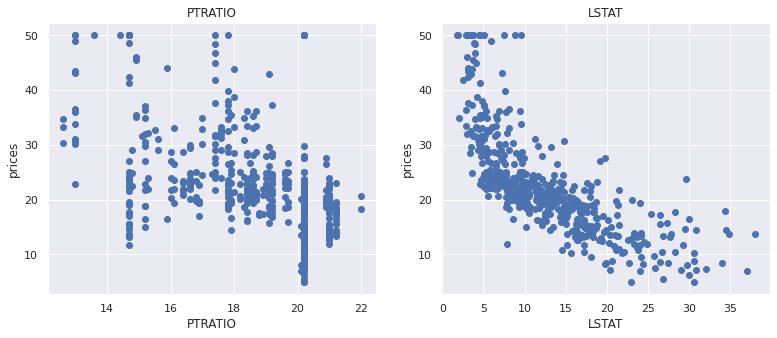

In [ ]:
plt.figure(figsize=(20, 5))

# i: index
for i, col in enumerate(features.columns):
    # 3 plots here hence 1, 3
    plt.subplot(1, 3, i+1)
    x = dataset[col]
    y = targets
    plt.plot(x, y, 'o')
    # Create regression line
    # plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) ///?
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

In [ ]:
(X_train ,X_test, y_train, y_test) = train_test_split(features, targets, test_size=0.2, random_state=42, shuffle=False)

In [ ]:
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)
print("type of X_train : ",type(X_train))

X_train :  (404, 2)
X_test :  (102, 2)
y_train :  (404, 1)
y_test :  (102, 1)
type of X_train :  <class 'pandas.core.frame.DataFrame'>


###Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##Linear Regression using sk-learn

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

0.5611798399289958

In [ ]:
reg.coef_

array([[-2.35572166, -5.85057626]])

In [ ]:
y_test_predict = reg.predict(X_test)
type(y_test_predict)

numpy.ndarray

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_test_predict))

Mean squared error: 16.40


#Section 2: Classification

##Pima Indians Diabetes

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/AI-Internship/diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


My hypothesis : All of the features has effect on diabetes. for example if the amount of Insulin decreases it can not control the diabetes ,so the probability of diabetes increases.

In [5]:
df.shape

(768, 9)

In [9]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


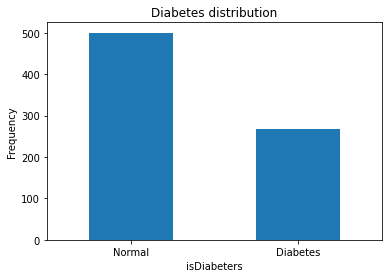

In [11]:
# diabetes distribution in df
LABELS = ["Normal", "Diabetes"]

count_classes = df.value_counts(df['Outcome'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Diabetes distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("isDiabeters")
plt.ylabel("Frequency");

Text(0.5, 1.0, 'Box Plot for each feature')

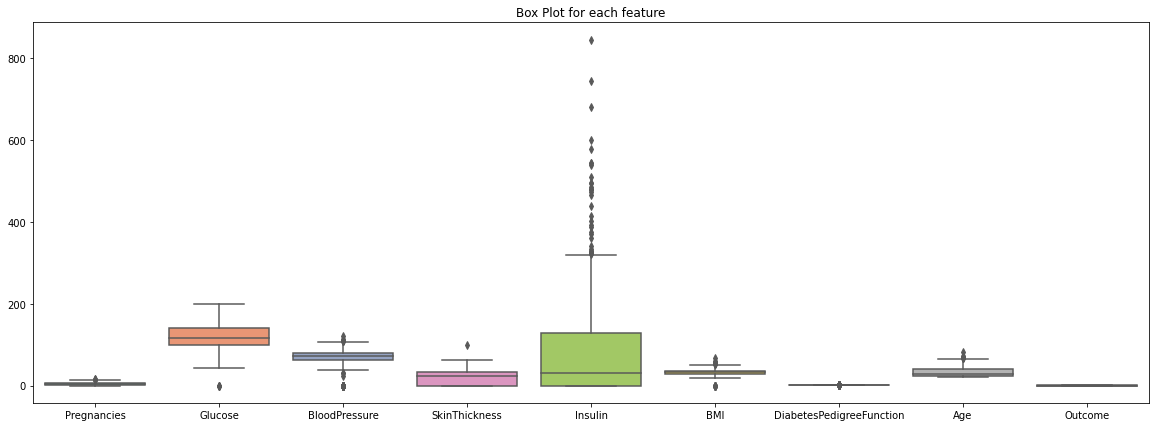

In [27]:
fig = plt.figure(figsize =(20, 7))
# Creating plot
ax = sns.boxplot(data=df, orient="v", palette="Set2")
plt.title("Box Plot for each feature")


Insulin has many outlier data

In [28]:
# replace outlier data with median value for each feature
print(df['Insulin'].quantile(0.50)) 
print(df['Insulin'].quantile(0.95)) 

30.5
293.0


In [29]:
df['Insulin'] = np.where(df['Insulin'] > 293, 30.5, df['Insulin'])
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,59.473958,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,75.573893,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,29.750000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,106.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,293.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'Box Plot for each feature')

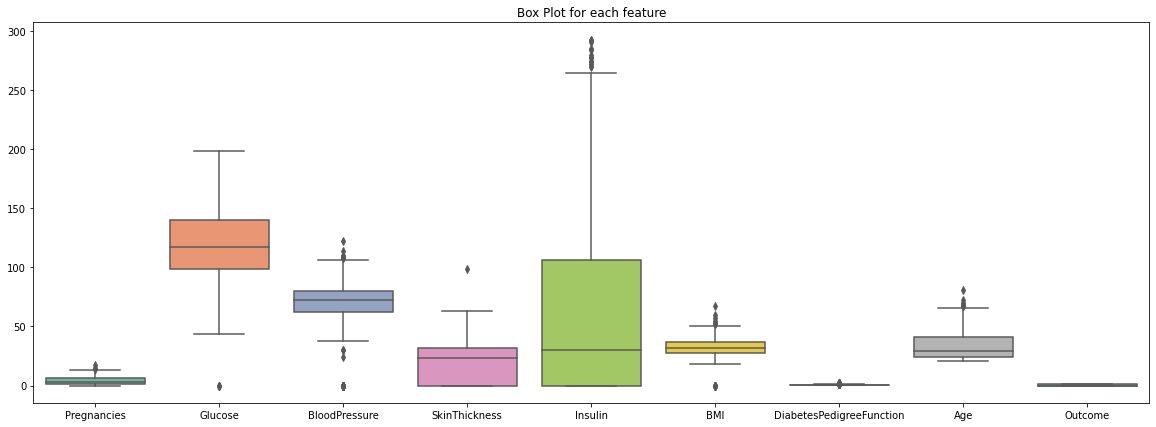

In [30]:
fig = plt.figure(figsize =(20, 7))
# Creating plot
ax = sns.boxplot(data=df, orient="v", palette="Set2")
plt.title("Box Plot for each feature")

###Correlation Matrix

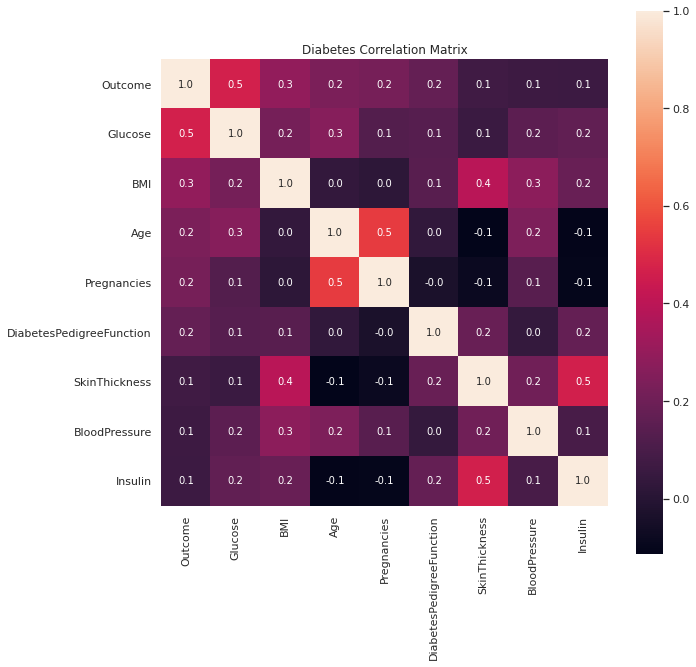

In [31]:
#Diabetes correlation matrix
correlation_matrix = df.corr()
k = 9 #number of variables for heatmap
cols = correlation_matrix.nlargest(k,'Outcome')['Outcome'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.01f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,ax=ax)
plt.title("Diabetes Correlation Matrix")
plt.show()

###Feature Selection

In [32]:
# Correlation with output varibale
cor_target = abs(correlation_matrix["Outcome"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.2]
relevant_features

Pregnancies    0.221898
Glucose        0.466581
BMI            0.292695
Age            0.238356
Outcome        1.000000
Name: Outcome, dtype: float64

In [33]:
print(df[["Pregnancies","Glucose"]].corr())

print(df[["BMI","Age"]].corr())

print(df[["Pregnancies","Age"]].corr())# highly correlated

             Pregnancies   Glucose
Pregnancies     1.000000  0.129459
Glucose         0.129459  1.000000
          BMI       Age
BMI  1.000000  0.036242
Age  0.036242  1.000000
             Pregnancies       Age
Pregnancies     1.000000  0.544341
Age             0.544341  1.000000


Age is more correlated with Outcome than pregnancies.

In [34]:
print(df[["Outcome","Age"]].corr())

print(df[["Outcome","Pregnancies"]].corr())

          Outcome       Age
Outcome  1.000000  0.238356
Age      0.238356  1.000000
              Outcome  Pregnancies
Outcome      1.000000     0.221898
Pregnancies  0.221898     1.000000


In [35]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [36]:
df.drop(labels= ['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction'], axis=1, inplace=True) # remove irrelavent columns features
df.head()

,Glucose,BMI,Age,Outcome
0,148,33.6,50,1
1,85,26.6,31,0
2,183,23.3,32,1
3,89,28.1,21,0
4,137,43.1,33,1


In [40]:
features = df.drop(columns='Outcome')
targets = pd.DataFrame(df['Outcome'])

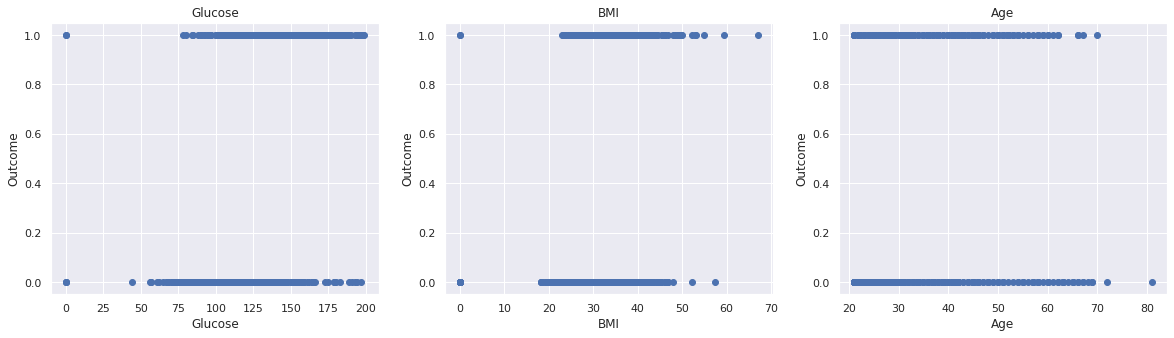

In [44]:
plt.figure(figsize=(20, 5))

# i: index
for i, col in enumerate(features.columns):
    # 3 plots here hence 1, 3
    plt.subplot(1, 3, i+1)
    x = df[col]
    y = targets
    plt.plot(x, y, 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Outcome')

In [45]:
# split train and test dataset
(X_train ,X_test, y_train, y_test) = train_test_split(features, targets, test_size=0.2, random_state=42, shuffle=False)

In [46]:
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)
print("type of X_train : ",type(X_train))

X_train :  (614, 3)
X_test :  (154, 3)
y_train :  (614, 1)
y_test :  (154, 1)
type of X_train :  <class 'pandas.core.frame.DataFrame'>


###Standardization

In [47]:
# set mean of all the feature to 0 and std to 1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##Model training : Logistic regression

In [49]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
y_test_predict = clf.predict(X_test)

In [58]:
clf.score(X_test,y_test)

0.7792207792207793

###Confusion Matrix

In [61]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_test_predict)
print(cnf_matrix)

[[89 10]
 [24 31]]



TP = 89 | FP = 10|
FN = 24 | TN = 31

it's faslely predicted taht 24 person don't have diabetes

Text(0.5, 257.44, 'Predicted label')

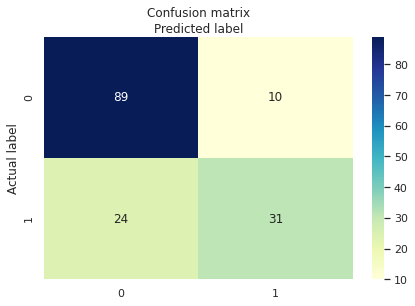

In [62]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [63]:
print("Accuracy:",metrics.accuracy_score(y_test, y_test_predict))
print("Precision:",metrics.precision_score(y_test, y_test_predict))
print("Recall:",metrics.recall_score(y_test, y_test_predict))

Accuracy: 0.7792207792207793
Precision: 0.7560975609756098
Recall: 0.5636363636363636
